In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynascale.utils.lds import plot
from dynascale.challenges.lds import LDSChallenge

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

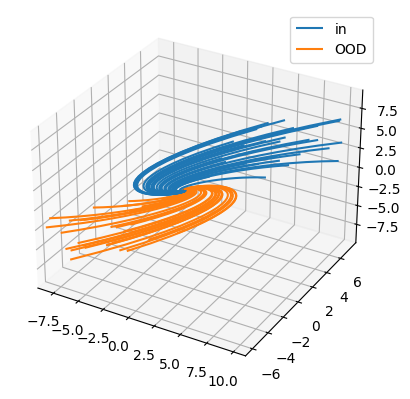

In [7]:
challenge = LDSChallenge(2, 3)
x0 = challenge.make_init_conds(50)
y0 = challenge.make_init_conds(50, in_dist=False)
x = challenge.make_data(x0, timesteps=50)
y = challenge.make_data(y0, timesteps=50)
model = # TODO
model.fit(x)
pred = model.predict(y0)
plot([y, pred], target_dim=3, labels=["test", "pred"])